In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-category-trainingdata/news_category_trainingdata.json


In [2]:
import os
# try:
#   import ktrain
# except:
#   !pip install ktrain
#   os.kill(os.getpid(), 9)
# import ktrain

from sklearn.model_selection import train_test_split
!pip install tf-keras
print("TF_USE_LEGACY_KERAS:", os.getenv("TF_USE_LEGACY_KERAS"))
os.environ['TF_USE_LEGACY_KERAS'] = '1'
print("TF_USE_LEGACY_KERAS:", os.getenv("TF_USE_LEGACY_KERAS"))

try:
  import ktrain
except:
  !pip install ktrain
  import ktrain
from ktrain import text
from ktrain.text import texts_from_df


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
TF_USE_LEGACY_KERAS: None
TF_USE_LEGACY_KERAS: 1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 61.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 43.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - d

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Jun 20 18:29:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0              26W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 33.7 gigabytes of available RAM

You are using a high-RAM runtime!


In [5]:
reviews = pd.read_json("/kaggle/input/news-category-trainingdata/news_category_trainingdata.json")

## EDA

In [6]:
reviews.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [7]:
reviews["category"].value_counts()

category
POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: c

In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 10.7+ MB


## Prepare Data

In [9]:
reviews["combined_text"] = reviews["headline"].str.lower() + ' ' + reviews["short_description"].str.lower()

In [10]:
# healthy living and wellness articles
reviews[reviews["category"].str.contains("HEALTHY LIVING")].head()

,category,headline,authors,link,short_description,date,combined_text
7578,HEALTHY LIVING,To The People Who Say ‘I’m Tired’ When Someone...,"The Mighty, ContributorWe face disability, dis...",https://www.huffingtonpost.com/entry/to-the-pe...,"When you feel like this, it’s important to kno...",2018-01-16,to the people who say ‘i’m tired’ when someone...
7693,HEALTHY LIVING,Eating Shake Shack Made Me Feel Healthier Than...,"Colleen Werner, ContributorCampus Editor-at-Large",https://www.huffingtonpost.com/entry/eating-sh...,I can vividly remember the first time I felt f...,2018-01-12,eating shake shack made me feel healthier than...
7747,HEALTHY LIVING,How To Stay Updated On The News Without Losing...,Lindsay Holmes,https://www.huffingtonpost.com/entry/anxiety-f...,Because it's only becoming more of a struggle.,2018-01-12,how to stay updated on the news without losing...
7927,HEALTHY LIVING,27 Perfect Tweets About Whole30 That Will Make...,Lindsay Holmes,https://www.huffingtonpost.com/entry/tweets-ab...,"""The only Whole30 I want to participate in is ...",2018-01-10,27 perfect tweets about whole30 that will make...
7934,HEALTHY LIVING,The Real Reason Your Hands Are Always Cold,"Refinery29, ContributorThe #1 new-media brand ...",https://www.huffingtonpost.com/entry/the-real-...,"Essentially, your hands are kept warm thanks t...",2018-01-10,the real reason your hands are always cold ess...


In [11]:
reviews[reviews["category"].str.contains("HEALTHY LIVING")].shape

(6694, 7)

In [12]:
# healthy living and wellness articles
reviews[reviews["category"].str.contains("WELLNESS")].head()

,category,headline,authors,link,short_description,date,combined_text
124989,WELLNESS,Why Overeating Doesn't Make You Fat,"Mark Hyman, MD, Contributor\nPracticing Physician",https://www.huffingtonpost.com/entry/overeatin...,If you take the right approach to ending your ...,2014-04-17,why overeating doesn't make you fat if you tak...
124990,WELLNESS,14 Habits Of People With A Healthy Relationshi...,Sarah Klein,https://www.huffingtonpost.com/entry/healthy-r...,After a long list of rules and habits like the...,2014-04-17,14 habits of people with a healthy relationshi...
124993,WELLNESS,5 Things That Could Be Stealing Your Joy,"Amanda Gore, Contributor\nInternational keynot...",https://www.huffingtonpost.com/entry/joy_us_5b...,Listen to yourself all day today -- are you an...,2014-04-17,5 things that could be stealing your joy liste...
124994,WELLNESS,Moments Make a Life,"Megan McDonough, Contributor\nCEO, Wholebeing ...",https://www.huffingtonpost.com/entry/moments-m...,Consciously constructing positive habits -- or...,2014-04-17,moments make a life consciously constructing p...
124996,WELLNESS,Fat Facts,"Maria Rodale, Contributor\nCEO and Chairman of...",https://www.huffingtonpost.com/entry/fat-facts...,"Human fat cells, photo by Dr. Peeke Here's how...",2014-04-17,"fat facts human fat cells, photo by dr. peeke ..."


In [13]:
reviews[reviews["category"].str.contains("WELLNESS")].shape

(17827, 7)

In [14]:
reviews["health_wellness"] = np.where((reviews["category"] == "HEALTHY LIVING") | (reviews["category"] == "WELLNESS"), 1, 0)

In [15]:
reviews["health_wellness"].value_counts()

health_wellness
0    176332
1     24521
Name: count, dtype: int64

In [16]:
target_names = ["NOT HEALTH WELLNESS", "HEALTH WELLNESS"]

## Balance the Data

In [17]:
sample_amount = 24000

health_wellness = reviews[reviews["health_wellness"] == 1].sample(n=sample_amount)
not_health_wellness = reviews[reviews["health_wellness"] == 0].sample(n=sample_amount)

In [18]:
review_sample = pd.concat([health_wellness, not_health_wellness])

In [19]:
review_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48000 entries, 125265 to 33796
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   category           48000 non-null  object        
 1   headline           48000 non-null  object        
 2   authors            48000 non-null  object        
 3   link               48000 non-null  object        
 4   short_description  48000 non-null  object        
 5   date               48000 non-null  datetime64[ns]
 6   combined_text      48000 non-null  object        
 7   health_wellness    48000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 3.3+ MB


In [20]:
def ktrain_model(preprocess_mode, text_process):
    train, val, preprocess = ktrain.text.texts_from_df(
    review_sample,
    "combined_text",
    label_columns=["health_wellness"],
    val_df=None,
    max_features=20000,
    maxlen=512,
    val_pct=0.1,
    ngram_range=1,
    preprocess_mode=preprocess_mode,
    random_state=42, 
    verbose=1
    )

    model = ktrain.text.text_classifier(text_process, train, preproc=preprocess)

    learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=8)

    learner.lr_find(max_epochs=6)

    learner.lr_plot()

    history=learner.autofit(
    1e-4,
    checkpoint_folder='checkpoint',
    epochs=10,
    early_stopping=True
    )

    predictor = ktrain.get_predictor(learner.model, preproc=preprocess)

    validation = learner.validate(val_data=val, print_report=True)

['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
171244                  0.0              1.0
165244                  0.0              1.0
25086                   1.0              0.0
164085                  1.0              0.0
19539                   0.0              1.0
['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
161788                  1.0              0.0
60418                   1.0              0.0
132502                  1.0              0.0
82984                   0.0              1.0
23397                   0.0              1.0
language: en
Word Counts: 52527
Nrows: 43200
43200 train sequences
train sequence lengths:
	mean : 32
	95percentile : 57
	99percentile : 67
x_train shape: (43200,512)
y_train shape: (43200, 2)
Is Multi-Label? False
4800 test sequences
test sequence lengths:
	mean : 31
	95percentile : 57
	99percentile : 68
x_test shape: (4800,512)
y_test shape: (4800, 2)
Is Multi-Label? Fa

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/6
5400/5400 [==============================] - 48s 4ms/step - loss: 0.9040 - accuracy: 0.5027
Epoch 2/6
5400/5400 [==============================] - 21s 4ms/step - loss: 0.8716 - accuracy: 0.5086
Epoch 3/6
5400/5400 [==============================] - 21s 4ms/step - loss: 0.6597 - accuracy: 0.6302
Epoch 4/6
5400/5400 [==============================] - 21s 4ms/step - loss: 0.4900 - accuracy: 0.7728
Epoch 5/6
5400/5400 [==============================] - 21s 4ms/step - loss: 1.3886 - accuracy: 0.5156
Epoch 6/6
5400/5400 [==============================] - 21s 4ms/step - loss: 0.9219 - accuracy: 0.4990


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


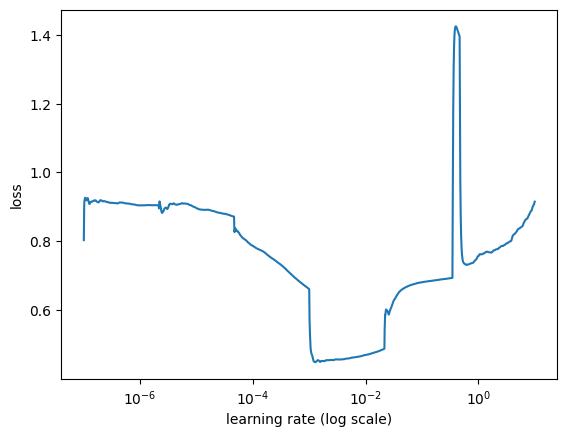



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/10
5400/5400 [==============================] - 28s 5ms/step - loss: 0.7802 - accuracy: 0.5509 - val_loss: 0.6009 - val_accuracy: 0.7565
Epoch 2/10
5400/5400 [==============================] - 41s 8ms/step - loss: 0.6434 - accuracy: 0.6387 - val_loss: 0.4922 - val_accuracy: 0.8048
Epoch 3/10
5400/5400 [==============================] - 25s 5ms/step - loss: 0.5548 - accuracy: 0.7150 - val_loss: 0.4139 - val_accuracy: 0.8292
Epoch 4/10
5400/5400 [==============================] - 25s 5ms/step - loss: 0.4836 - accuracy: 0.7713 - val_loss: 0.3638 - val_accuracy: 0.8498
Epoch 5/10
5400/5400 [==============================] - 25s 5ms/step - loss: 0.4443 - accuracy: 0.7970 - val_loss: 0.3369 - val_accuracy: 0.8640
Epoch 6/10
5400/5400 [==============================] - 25s 5ms/step - loss: 0.4109 - accuracy: 0.8183 - val_loss: 0.3169 - val_accuracy: 0.8717
Epoch 7/10
5400/5400 [============================

In [21]:
ktrain_model("standard", "fasttext")

['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
171244                  0.0              1.0
165244                  0.0              1.0
25086                   1.0              0.0
164085                  1.0              0.0
19539                   0.0              1.0
['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
161788                  1.0              0.0
60418                   1.0              0.0
132502                  1.0              0.0
82984                   0.0              1.0
23397                   0.0              1.0
language: en
Word Counts: 52527
Nrows: 43200
43200 train sequences
train sequence lengths:
	mean : 32
	95percentile : 57
	99percentile : 67
x_train shape: (43200,512)
y_train shape: (43200, 2)
Is Multi-Label? False
4800 test sequences
test sequence lengths:
	mean : 31
	95percentile : 57
	99percentile : 68
x_test shape: (4800,512)
y_test shape: (4800, 2)
Is Multi-Label? Fa

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/6
5400/5400 [==============================] - 19s 3ms/step - loss: 0.7002 - accuracy: 0.4774
Epoch 2/6
5400/5400 [==============================] - 17s 3ms/step - loss: 0.6632 - accuracy: 0.6201
Epoch 3/6
5400/5400 [==============================] - 17s 3ms/step - loss: 0.4499 - accuracy: 0.8381
Epoch 4/6
5400/5400 [==============================] - 17s 3ms/step - loss: 0.2831 - accuracy: 0.8997
Epoch 5/6
5400/5400 [==============================] - 11s 2ms/step - loss: 1.0859 - accuracy: 0.8618


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


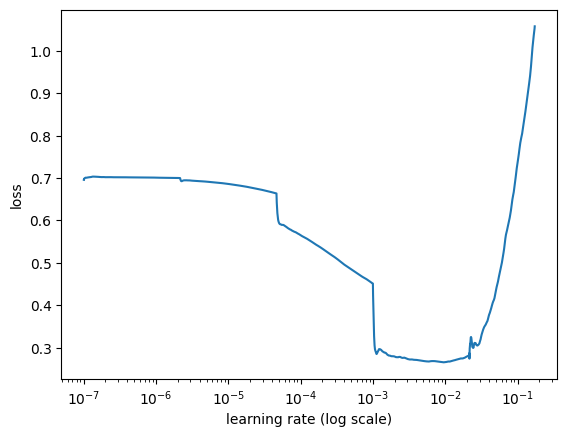



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/10
5400/5400 [==============================] - 22s 4ms/step - loss: 0.5674 - accuracy: 0.7426 - val_loss: 0.4876 - val_accuracy: 0.8279
Epoch 2/10
5400/5400 [==============================] - 21s 4ms/step - loss: 0.4319 - accuracy: 0.8619 - val_loss: 0.4091 - val_accuracy: 0.8640
Epoch 3/10
5400/5400 [==============================] - 21s 4ms/step - loss: 0.3707 - accuracy: 0.8862 - val_loss: 0.3684 - val_accuracy: 0.8763
Epoch 4/10
5400/5400 [==============================] - 22s 4ms/step - loss: 0.3356 - accuracy: 0.8950 - val_loss: 0.3443 - val_accuracy: 0.8788
Epoch 5/10
5400/5400 [==============================] - 21s 4ms/step - loss: 0.3126 - accuracy: 0.9001 - val_loss: 0.3281 - val_accuracy: 0.8838
Epoch 6/10
5400/5400 [==============================] - 21s 4ms/step - loss: 0.2959 - accuracy: 0.9042 - val_loss: 0.3166 - val_accuracy: 0.8852
Epoch 7/10
5400/5400 [============================

In [22]:
ktrain_model("standard", "nbsvm")

['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
171244                  0.0              1.0
165244                  0.0              1.0
25086                   1.0              0.0
164085                  1.0              0.0
19539                   0.0              1.0
['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
161788                  1.0              0.0
60418                   1.0              0.0
132502                  1.0              0.0
82984                   0.0              1.0
23397                   0.0              1.0
language: en
Word Counts: 52527
Nrows: 43200
43200 train sequences
train sequence lengths:
	mean : 32
	95percentile : 57
	99percentile : 67
x_train shape: (43200,512)
y_train shape: (43200, 2)
Is Multi-Label? False
4800 test sequences
test sequence lengths:
	mean : 31
	95percentile : 57
	99percentile : 68
x_test shape: (4800,512)
y_test shape: (4800, 2)
Is Multi-Label? Fa

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/6
5400/5400 [==============================] - 18s 3ms/step - loss: 0.6967 - accuracy: 0.4840
Epoch 2/6
5400/5400 [==============================] - 17s 3ms/step - loss: 0.6697 - accuracy: 0.6050
Epoch 3/6
5400/5400 [==============================] - 17s 3ms/step - loss: 0.5016 - accuracy: 0.8153
Epoch 4/6
5400/5400 [==============================] - 18s 3ms/step - loss: 0.3372 - accuracy: 0.8781
Epoch 5/6
5400/5400 [==============================] - 10s 2ms/step - loss: 1.2295 - accuracy: 0.8416


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


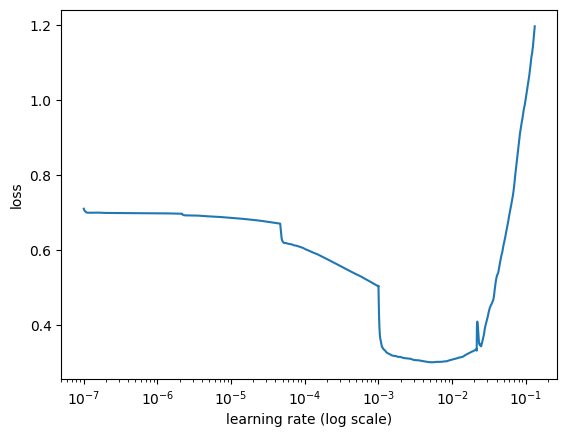



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/10
5400/5400 [==============================] - 22s 4ms/step - loss: 0.6012 - accuracy: 0.7187 - val_loss: 0.5391 - val_accuracy: 0.8023
Epoch 2/10
5400/5400 [==============================] - 22s 4ms/step - loss: 0.4908 - accuracy: 0.8366 - val_loss: 0.4659 - val_accuracy: 0.8360
Epoch 3/10
5400/5400 [==============================] - 21s 4ms/step - loss: 0.4305 - accuracy: 0.8611 - val_loss: 0.4227 - val_accuracy: 0.8515
Epoch 4/10
5400/5400 [==============================] - 22s 4ms/step - loss: 0.3912 - accuracy: 0.8744 - val_loss: 0.3937 - val_accuracy: 0.8621
Epoch 5/10
5400/5400 [==============================] - 21s 4ms/step - loss: 0.3629 - accuracy: 0.8846 - val_loss: 0.3727 - val_accuracy: 0.8700
Epoch 6/10
5400/5400 [==============================] - 21s 4ms/step - loss: 0.3417 - accuracy: 0.8910 - val_loss: 0.3571 - val_accuracy: 0.8727
Epoch 7/10
5400/5400 [============================

In [23]:
ktrain_model("standard", "logreg")

['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
171244                  0.0              1.0
165244                  0.0              1.0
25086                   1.0              0.0
164085                  1.0              0.0
19539                   0.0              1.0
['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
161788                  1.0              0.0
60418                   1.0              0.0
132502                  1.0              0.0
82984                   0.0              1.0
23397                   0.0              1.0
language: en
Word Counts: 52527
Nrows: 43200
43200 train sequences
train sequence lengths:
	mean : 32
	95percentile : 57
	99percentile : 67
x_train shape: (43200,512)
y_train shape: (43200, 2)
Is Multi-Label? False
4800 test sequences
test sequence lengths:
	mean : 31
	95percentile : 57
	99percentile : 68
x_test shape: (4800,512)
y_test shape: (4800, 2)
Is Multi-Label? Fa

done.
simulating training for different learning rates... this may take a few moments...


/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/6
5400/5400 [==============================] - 158s 27ms/step - loss: 0.6909 - accuracy: 0.5310
Epoch 2/6
5400/5400 [==============================] - 150s 28ms/step - loss: 0.6364 - accuracy: 0.6648
Epoch 3/6
5400/5400 [==============================] - 150s 28ms/step - loss: 0.3040 - accuracy: 0.8734
Epoch 4/6
5400/5400 [==============================] - 151s 28ms/step - loss: nan - accuracy: 0.7741
Epoch 5/6
5400/5400 [==============================] - 150s 28ms/step - loss: nan - accuracy: 0.4988
Epoch 6/6
5400/5400 [==============================] - 150s 28ms/step - loss: nan - accuracy: 0.4988


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


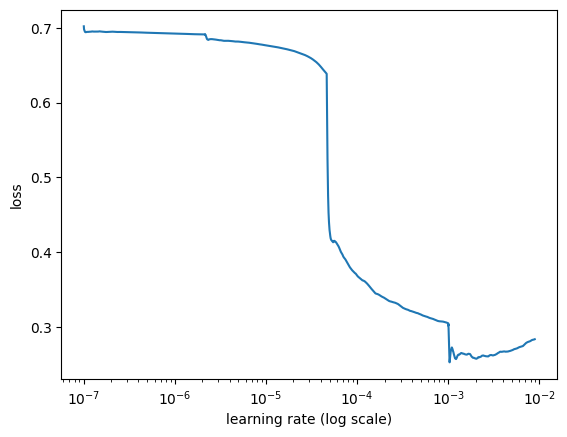



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/10
5400/5400 [==============================] - 165s 30ms/step - loss: 0.4288 - accuracy: 0.7980 - val_loss: 0.2790 - val_accuracy: 0.8848
Epoch 2/10
5400/5400 [==============================] - 160s 30ms/step - loss: 0.2496 - accuracy: 0.9007 - val_loss: 0.2578 - val_accuracy: 0.8935
Epoch 3/10
5400/5400 [==============================] - 160s 30ms/step - loss: 0.2145 - accuracy: 0.9162 - val_loss: 0.2542 - val_accuracy: 0.8919
Epoch 4/10
5400/5400 [==============================] - 160s 30ms/step - loss: 0.1896 - accuracy: 0.9267 - val_loss: 0.2559 - val_accuracy: 0.8927
Epoch 4: early stopping
Weights from best epoch have been loaded into model.
150/150 [==============================] - 4s 21ms/step
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2453
           1       0.88      0.90      0.89      2347

    accuracy                       

In [24]:
ktrain_model("standard", "bigru")

['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
171244                  0.0              1.0
165244                  0.0              1.0
25086                   1.0              0.0
164085                  1.0              0.0
19539                   0.0              1.0
['not_health_wellness', 'health_wellness']
        not_health_wellness  health_wellness
161788                  1.0              0.0
60418                   1.0              0.0
132502                  1.0              0.0
82984                   0.0              1.0
23397                   0.0              1.0
language: en
Word Counts: 52527
Nrows: 43200
43200 train sequences
train sequence lengths:
	mean : 32
	95percentile : 57
	99percentile : 67
x_train shape: (43200,512)
y_train shape: (43200, 2)
Is Multi-Label? False
4800 test sequences
test sequence lengths:
	mean : 31
	95percentile : 57
	99percentile : 68
x_test shape: (4800,512)
y_test shape: (4800, 2)
Is Multi-Label? Fa

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/6
5400/5400 [==============================] - 234s 43ms/step - loss: 0.6946 - accuracy: 0.4982
Epoch 2/6
5400/5400 [==============================] - 230s 43ms/step - loss: 0.6931 - accuracy: 0.5110
Epoch 3/6
5400/5400 [==============================] - 230s 43ms/step - loss: 0.4817 - accuracy: 0.7655
Epoch 4/6
5400/5400 [==============================] - 230s 43ms/step - loss: nan - accuracy: 0.6183
Epoch 5/6
5400/5400 [==============================] - 229s 42ms/step - loss: nan - accuracy: 0.4988
Epoch 6/6
5400/5400 [==============================] - 230s 43ms/step - loss: nan - accuracy: 0.4988


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


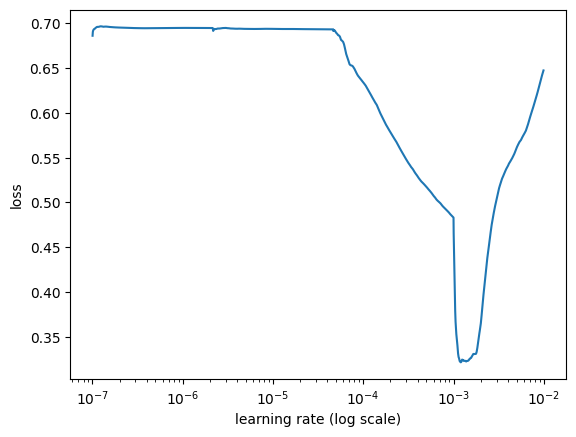



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/10
5400/5400 [==============================] - 247s 45ms/step - loss: 0.5887 - accuracy: 0.6537 - val_loss: 0.4023 - val_accuracy: 0.8217
Epoch 2/10
5400/5400 [==============================] - 243s 45ms/step - loss: 0.4150 - accuracy: 0.8130 - val_loss: 0.3270 - val_accuracy: 0.8635
Epoch 3/10
5400/5400 [==============================] - 243s 45ms/step - loss: 0.3511 - accuracy: 0.8489 - val_loss: 0.2945 - val_accuracy: 0.8785
Epoch 4/10
5400/5400 [==============================] - 244s 45ms/step - loss: 0.3150 - accuracy: 0.8670 - val_loss: 0.2812 - val_accuracy: 0.8856
Epoch 5/10
5400/5400 [==============================] - 244s 45ms/step - loss: 0.2879 - accuracy: 0.8809 - val_loss: 0.2716 - val_accuracy: 0.8898
Epoch 6/10
5400/5400 [==============================] - 243s 45ms/step - loss: 0.2707 - accuracy: 0.8892 - val_loss: 0.2663 - val_accuracy: 0.8931
Epoch 7/10
5400/5400 [================

In [25]:
ktrain_model("standard", "standard_gru")